# Meru Prastarah

In [1]:
# Some Python utility code
from pathlib import Path
home = str(Path.home()) + '/'
data = home + 'data/'             # A non-repository location for datasets of interest

def dirobj(obj): return [x for x in dir(obj) if not x.startswith('__')]

def lsal(path=''):
    import os
    return os.popen('ls -al ' + path).readlines()

def ShowGitHubImage(username, repo, folder, source, localcopyname, width, height):
    import requests, shutil
    from PIL import Image
    outf = home + localcopyname
    f = 'https://raw.githubusercontent.com/' + username + '/' + repo + '/master/' + folder + '/' + source
    a = requests.get(f, stream = True)
    if a.status_code == 200:
        with open(outf, 'wb') as f:
            a.raw.decode_content = True
            shutil.copyfileobj(a.raw, f)
    return Image.open(outf).resize((width,height),Image.ANTIALIAS)

def ShowLocalImage(pathfromhome, filename, width, height):
    import shutil
    from PIL import Image
    global home
    f = home + '/' + pathfromhome + '/' + filename 
    return Image.open(f).resize((width,height),Image.ANTIALIAS)

# Test either of the 'Show Image' functions
# ShowGitHubImage('robfatland', 'othermathclub', 'images/cellular', 'conus_textile_shell_2.png', 'ctextile.jpg', 450, 250)
# ShowLocalImage('.', 'ctextile.jpg', 450, 250)

/tmp/ipykernel_1863/3304072706.py:29: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  return Image.open(f).resize((width,height),Image.ANTIALIAS)


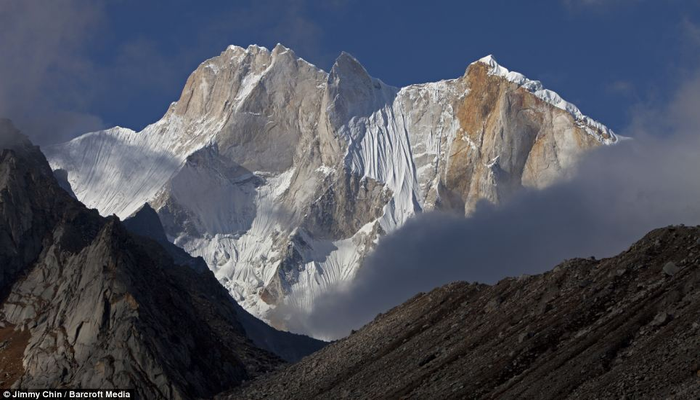

In [2]:
meru_d = 'othermathclub/images/meru/'
ShowLocalImage(meru_d, 'mount_meru.jpg', 700, 400)

*Mount Meru, located according to legend at the center of the universe*


### Friendly introduction


There is said to be an infinite staircase
descending from the summit of Mount Meru, the mythical mountain at the center of the universe.


'Meru staircase' translates approximately in Sanskrit as *Meru Prastarah*, so I am told.
Good news (since I do not enjoy climbing stairs): We begin at the very top of Mount Meru 
and go downwards. 


As we descend we shall count the pathways and write them down.
(Moving and writing sounds like Egon's Monte Carlo... hmmmm...) 


In the history of mathematics ideas are often discovered and re-discovered. Meru prastarah is such a thing: 
It is
referenced in Sanskrit texts, in the ancient mathematics of China by another name, elsewhere, elsewhen...


How many times has it been re-discovered and then lost again? We will never know. 
Most recently in the west (out of Europe) Meru Prastarah was rediscovered and named Pascale's triangle.


In this set of Notebooks we explore this infinite triangular pattern of numbers. It leads off in some
interesting and useful directions. But before getting to that let's consider a problem that may seem 
to have nothing to do with mountains at the center of the universe. 


<br>${\Huge \infty}$


Suppose you go to a meeting where everyone must shake hands with everyone else. When you arrive you
find there are a total of four people at the meeting. How many handshakes are there? What if there
are three people? Two people? 


Can you find a formula for the number of handshakes in the *abstract* or *general* sense? That
is: There are $n$ people at the meeting so how many handshakes? 


We will return to this problem at the bottom of this Notebook.


Now to our first order of business: This Notebook sequence on **Meru Prastarah** connects directly
with the Notebooks on **probability**.  


In the first *Probability* notebook we begin by learning counting 
with *factorials* and *combinations*. These are two tools for counting that are 
important in probability and also important in what we are doing here in this Notebook. 


Because they are both so crucial -- factorials and combinations -- let's take a moment to introduce 
them here as well.

#### ***factorial*** and ***combination*** quick introduction


The *factorial* is shown using an exclamation mark ***!*** like so:


$6!=6\cdot 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1=720$


We say 'Six factorial equals seven hundred and twenty.'
That's not too bad. $4!=24$ and $1!=1$ as expected.  But for some reason $0!=1$.
Just remember that as an odd rule.


Now with factorials in our pocket we can proceed to the *combination* formula. 


This formula uses two numbers $a$ and $b$ to produce a third number $c$. Incidentally 
$a$ and $b$ are both positive integers or they may be zero; and $b$ must be less than 
or equal to $a$. The combination formula is a *fraction* made from three factorials. 
So *combinations* are built from *factorials* and here is just how it goes (in huge font 
because it is so useful)...


$${\large Combination(a,\;b)=\frac{a!}{b!\;\cdot\;(a-b)!}}$$


As I mentioned you can learn more in the **1 J Probability** Notebook. The last thing 
we will mention is that rather than write **Combination(a, b)** each time we simplify by
writing $a$ above $b$ in parentheses like so:


$${\large Combination(a,\;b)=\binom{a}{b}=\frac{a!}{b!\;\cdot\;(a-b)!}}$$

### Terms


Please begin with three tasks concerning vocabulary. First: Carefully read the note
just below on ***getting stuck***. Second: Copy the **boldface** 
terms with definitions into your notebook. Third: Take turns explaining 
and reflecting the *remaining* terms with a partner. 


These terms are explained in greater detail on the **Combinatorics** track.

#### Getting stuck


Always keep an eye on yourself as you work on this mathematics, asking yourself the question 'Am I stuck?' 


The number one reason people get discouraged in mathematics is that they get stuck and do not know how to get
*un-stuck*. 


We try to put enough information here to keep you from getting stuck. At the moment the big danger
is getting stuck on ***factorials*** and ***combinations***; so we included the introduction just above. 


This Notebook will not always give you enough information, though. You need more resources for when
you get stuck. Here are two. 


First: You can *just keep reading* even when things do not make total
sense. When we keep reading sometimes things will click; or we get enough of an idea that we can go back and
re-read from the beginning and things fall into place. 


Second: Remember that you can ask teachers, club guides, and *very importantly* your fellow students. 
This is why the partner idea is so important to our process in the OMC this year.

#### Terms to copy and partner-share

- The **factorial $n!$** is the product of the integers from $1$ to $n$; so $4!=1\cdot2\cdot3\cdot4=24$
- **combination**: The number of ways to choose $b$ things from a set of $a$ things without any concern for order
  - This is written $a\choose b$
  - Consider a set with 5 elements: How many subsets have 3 elements? (Answer: 10)
    - We write 
$Combination(5,\;3)=\binom{5}{3}=\frac{5!}{3!\; (5-3)!}=\frac{5\cdot 4\cdot 3\cdot 2\cdot 1}{3\cdot 2\cdot 1\cdot 2\cdot 1}=10$
    - ...or simply $\binom{5}{3} =10$
- Mount Meru: A mythical mountain at the center of the universe
- Meru Prastarah: A staircase descending from the summit of Mount Meru (see below)

/tmp/ipykernel_1863/3304072706.py:29: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  return Image.open(f).resize((width,height),Image.ANTIALIAS)


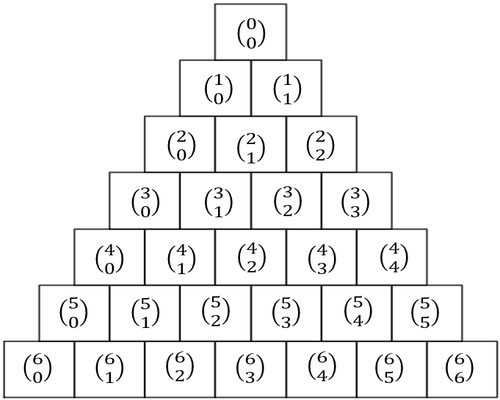

In [3]:
ShowLocalImage(meru_d, 'meru7_coordinates.png', 500, 400)

*the coordinates of Meru Prastarah: Top number is the row (starting at zero) and bottom number is the cell (also starting at zero)*

<br>
<br>


- coordinates: Two numbers that tell us the row and cell number of a location in the Meru Prastarah pattern
- row: The up/down coordinate of a row of cells beginning at $0$ at the very top and counting downwards $1,\;2,\;3,\;\dots$
- cell: The left/right coordinate of a cell in row $n$ beginning at $0$ and counting $1,\;2,\;3,\;\dots\;,\;n$
  - notice that each *row* has $n+1$ cells
- entry: The number written in a cell of Meru Prastarah. At the summit the entry is $1$. At $\binom{5}{3}$ the entry is $10$.
  - We calculate the *entry* from the *coordinates*. 
  - $\binom{5}{3}\;=\;\frac{5!}{3!\;\cdot\;2!}\;=\;\frac{120}{12}\;=\;10$.

/tmp/ipykernel_1863/3304072706.py:29: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  return Image.open(f).resize((width,height),Image.ANTIALIAS)


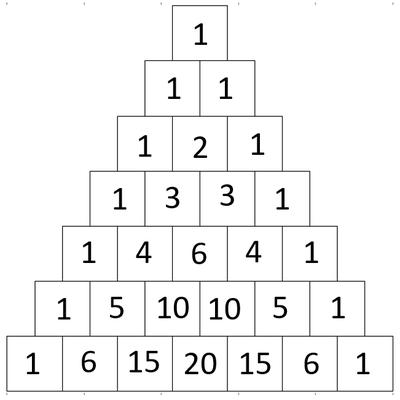

In [4]:
ShowLocalImage(meru_d,'meru7_numbers.png',400,400)

*the entries for the first seven rows of Meru Prastarah: Calculated from the combination function*

<br>
<br>


### Hike


- We begin by drawing Meru Prastarah with no entries. We identify coordinates for cells.  
- We learn to count paths to write entries in cells. These are numbers. 
- We compare *count paths* to our *combination* formula. They should match.
- We shade the cells based on whether they are odd or even. 
- On the second page we continue the hike to our first goal: We are seeking a looking glass mountain that rises into the sky. 


### Begin


Please run the code below to see what Meru Prastarah looks like.


- click on the cell so it has a green outline
- hold down the Shift key and press Enter
- after a few moments a diagram should appear below the cell


Paper copies are available at club meetings. 


Use the slider to change how many rows of the mountain you see.

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from ipywidgets import *
from traitlets import dlink

def BlankMeruPrastarah(nRows):
    fig, ax = plt.subplots(figsize=(12,10))
    ax.axis('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    lower_limit = -0.01
    upper_limit = 1.01
    ax.set(xlim=(lower_limit, upper_limit), ylim=(lower_limit,upper_limit))
    # ax.set(xlabel='cells 1 ... 1 left to right', ylabel = 'rows 0, 1, ... top to bottom (forever!)', \
    #   title='etalpmet haratsarp ureM bulc htam rehto')
    dx = 1.0/nRows
    dy = 1.0/nRows
    for row in range(nRows):
        this_row = row + 1
        for column in range(this_row):
            x = 0.5 - float(this_row)*0.5*dx + float(column)*dx
            y = 1.0 - dy*float(this_row)
            ax.plot([x, x+dx, x+dx, x, x], [y, y, y+dy, y+dy, y], color='k')
    plt.show()
    
interact(BlankMeruPrastarah, nRows=widgets.IntSlider(min=1,max=60,step=1,value=5, continuous_update=False))

interactive(children=(IntSlider(value=5, continuous_update=False, description='nRows', max=60, min=1), Output(…

<function __main__.BlankMeruPrastarah(nRows)>

*Above: the staircase of Mount Meru with no entries in the cells yet; that's next*

${\Huge \infty}$


### Climbing down the mountain

This is a pencil and paper activity. Please get printouts from the club supply. You can also make and print
versions of the diagram above if you can't attend club meetings. You can also simply write in your notebook
keeping to the format of the mountain. 


Please write the number $1$ in the very top spot. This we will call row zero (not row one). Row $0$ is a short
*row* with only one *cell*, cell $0$. We write its coordinates with the row number above the cell number:


$$\binom{0}{0}$$


The top number is the row and the bottom number is the cell. The *entry* in this cell is $1$.


Now supposing each step you take from here must go downhill and you are allowed to go either left or right.
You can choose your own pathway down the mountain. How many paths are there for you to go from row zero to 
the left cell of row one? Hopefully you agree that the answer is: $1$. Therefore please
write the number $1$ in the left cell of row 1, directly down and to the left of row zero. This cell
has coordinates ${\large \binom{1}{0}}$. 


Similarly the right cell (cell 1) of row one also receives a $1$. This cell has coordinates ${\large \binom{1}{1}}$.


Now consider the middle cell of row $2$ (coordinates ${\large \binom{2}{1}}$). 
How many ways are there of getting to that cell from ${\large \binom{0}{0}}$?
The answer is $2$: You can go down-left then down-right; or you can go down-right then down-left. 
However: The left and right cells of row $2$ have only one path to them from row zero; so again they receive 
the number $1$. (These have coordinates ${\large \binom{2}{0}}$ and ${\large \binom{2}{2}}$.)


Please proceed to row $3$. Here there are four cells with coordinates
${\large \binom{3}{0}}$,
${\large \binom{3}{1}}$,
${\large \binom{3}{2}}$ and
${\large \binom{3}{3}}$.
Cells $0$ and $3$ will both receive the number $1$ as before: Going down hill there is only one path
from the top to the first or last cell of any row. How about the two middle cells? Answer: These both 
receive the number $3$ because each has $3$ paths from row zero. 

Continue in this way for two or three more rows (or more if you like). Are patterns starting to 
appear? Comment in your notebook. Perhaps you see evidence for a simpler way of counting paths: 
Rather than counting up the number of paths from the very top (row zero) down to some cell: 
Add the two numbers above that cell to get the correct number of paths to that cell. 
This is an important idea so we take a moment to emphasize it. 


Suppose you wish to know how many paths there are to the supermarket. Furthermore suppose that 
you know there are only two entrances to the supermarket parking lot: From A street and from B street. 
If there are 4 ways of getting to A street and 7 ways of getting to B street then there must be
11 ways of getting to the supermarket. You naturally add up the possible ways. This suggests
that you could count paths in other number patterns -- for example a field of hexagons -- using
local information to represent accumulated information from further away. Could you use the same
idea in the Fibonacci sequence?


We have taken a first look at the numbers covering the paths of Mount Meru. At the very extreme
edges we have ones (for there is only one path down the sides) and as we go towards the center
of any row the numbers get larger and larger. Furthermore as we read numbers across the row they 
are symmetrical, reading the same backwards as forwards.

${\Huge \infty}$


### Entries by combination


Counting pathways is one way to get entry numbers. Since each cell has coordinates (row, cell) you 
can also calculate entries using the *combination* formula for ${\large \binom{row}{cell}}$. Try this out 
to be sure you get the same numbers.


$$entry\;=\;\binom{row}{cell}\;=\;\frac{row!}{cell!\;\cdot\;(row-cell)!}$$



### Never odd or even...


...sorry, my mistake: That should read '**Always** odd or even'. (Why do you suppose I made this mistake?)


Meru Prastarah cell entries are some odd and some even. Let's call these even cells and odd cells. 
Perhaps there is a pattern to how they are distributed. 
If possible: Get a paper copy of Meru Prastarah with small empty cells. 
You can move the slider to $50$ in the experiment above for example.
The cells are too small to write numbers in but that is ok: We just want to shade the odd cells in with a pencil. 
Leave the even cells blank.


Take a moment to be sure you are ok with these rules of addition:


- even + even = even
- even + odd = odd
- odd + even = odd
- odd + odd = even

<br>${\Huge \infty}$

Shade the odd cells of Meru Prastarah with a pencil or marker.
Row zero is $1$, odd, so shade it in. 
Row one has two cells, both $1$, both odd; shade them both.
Row two is odd-even-odd. Shade the outer two, leave the even one blank.
Down both sides of the mountain shade the first and last cells: They are all $1$ so they are shaded in.  


Now proceed to mark the interior cells of the mountain, again from the top down. 
Remember you are just marking odds and leaving evens blank. You do not need to figure out the numbers.
Use the four rules from above. Each cell is odd or even based on the two cells above it:


- above-cells above are blank: leave the new cell blank (because even + even = even)
- above-cells above are shaded: leave the new cell blank (odd + odd = even)
- above-cells above are one blank, one shaded: shade in the new cell (odd + even = even + odd = odd)


Notice row $2$ is odd-even-odd (shaded-blank-shaded) and row three is odd-odd-odd-odd, shaded
all the way across. Row $7$ and row $15$ are also shaded all the way across.
These are checks to make sure everything is working. 
Some rows of Meru Prastarah are entirely odd all the way across. 


<br>${\Huge \infty}$


What does this tell you about the row above them?


Once you have produced a shaded-in version of Meru prastarah in this way you might tape it to the wall or
inside a notebook or somewhere. You are welcome and encouraged to look at the **Monte Carlo** notebook.

${\Huge \infty}$

### Freehand drawing


Take out a blank sheet on your OneNote and draw the first five or six rows of Meru Prastarah using
the $\binom{row}{cell}$ notation. The very top row (row $0$) will have $\binom{0}{0}$, and so on.
Then draw the same diagram replacing $\binom{row}{cell}$ with the cell entries. The very top
row entry will be $1$, and so on.





### The edge of the mountain


Notice that you can read the numbers in the cells diagonally. The first diagonal is all ones: $1\;1\;1\;1\;1\cdots$.
These numbers are $\binom{0}{0}\;\binom{1}{0}\;\binom{2}{0}\;
\binom{3}{0}\;\binom{4}{0}$. Given any set of any size there is only one way to select zero of its elements.

This is equivalent to saying that there is exactly one way of choosing *all* of them; and so the diagonal
going the other way is also all ones.


<br> ${\Huge \infty}$


#### The second diagonal


The second diagonal is the counting numbers: $1-2-3-4-5-6-\cdots$.
- Write down the first five counting numbers and their row/cell coordinates 
starting with $1=\binom{1}{1},\;2=\binom{2}{1},$ and so on. 


<br> ${\Huge \infty}$


#### The third diagonal: The handshake problem


- In a meeting of two people how many handshakes are there? 
  - Answer: One. The two people shake hands with one another. 
- In a meeting of three people how many handshakes? How about four people, and five people? 
- Can you come up with a formula for the number of handshakes given $n$ people? 
- How would you relate this to the numbers in the cells of Meru Prastarah? 
  - This supposes that the *row* number of Meru Prastarah matches the number of people in the meeting
  - Write down your ideas on how this works
Why do you suppose the third diagonal of Meru Prastarah is called the *triangular numbers*? 
  - Compare two consecutive triangular numbers; what is special about their sum?


/tmp/ipykernel_1863/3304072706.py:29: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  return Image.open(f).resize((width,height),Image.ANTIALIAS)


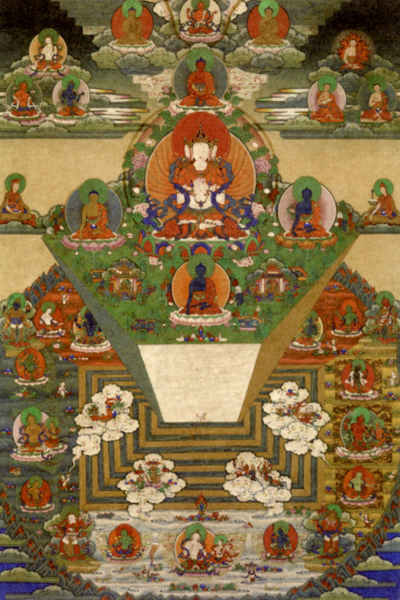

In [6]:
ShowLocalImage(meru_d, 'meru_cosmology.png', 400, 600)

*Bhutanese cosmological depiction of Mount Meru*


### Friendly introduction to Part 2


I would like to remind you that according to legends Mount Meru is the great mountain at the center of the universe. 
*Meru Prastarah* is the staircase descending from the summit... and we have a notation for the locations
and the numbers placed across this mountain. It is known by other names including *Pascale's Triangle*.


If this is unfamiliar please go read through the prior Notebook, called **1 B Meru Prastarah**. This one follows
that one. To continue here you know where ${\large \binom{4}{2}}$ is located on the diagram below and you 
know how to calculate numbers that go in the cells by putting their coordinates (row and cell numbers) into
the *combination* function.


Here are the first seven rows (rows $0$ through $6$) of Meru Prastarah...

/tmp/ipykernel_1863/3304072706.py:29: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  return Image.open(f).resize((width,height),Image.ANTIALIAS)


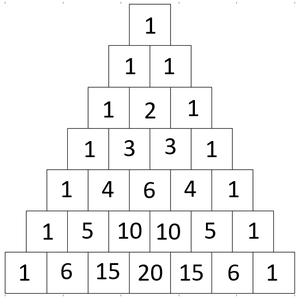

In [7]:
ShowLocalImage(meru_d,'meru7_numbers.png', 300, 300)

*Rows zero through six of Meru prastarah... and what does each row add up to?*


#### The ***second result***


What do the rows sum to? This page begins with this question and proceeds to a related question
about the sums of tilted lines drawn through Meru Prastarah. We draw the tilted lines, add up the numbers
of the cells that they pass through and arrive at the **second result**.


When this *second result* is arrived at students are often told it is neato or marvellous or awesome... but 
not here because there is a danger: What if the students (being polite) agree
with us that the *second result is neato* and then immediately after think 'I wonder what is for lunch today.' 
They may not be so amazed you see.


Imagine this: We are driving along a winding mountain road in a car; and a sign says **Viewpoint Ahead**. Indeed the road 
ends so we park the car and get out. We walk a few more yards to reach the viewpoint. There is a little sign and a guard
rail. It looks rather steep, this cliff dropping away. 


Consider the *second result* as the viewpoint at the end of the road.
According to tradition we look at the view for a couple minutes and then we turn around to get back in the car... 


But not so fast. Here in this sequence of Notebooks we say 'Well this view of the *second result* is 
nice enough I suppose if you like that sort of thing but now please pull your backpack out of the trunk
of the car and put it on. We are going to climb down this cliff and head off into the wilderness. 
It will be weeks before we get back.'

/tmp/ipykernel_1863/3304072706.py:29: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  return Image.open(f).resize((width,height),Image.ANTIALIAS)


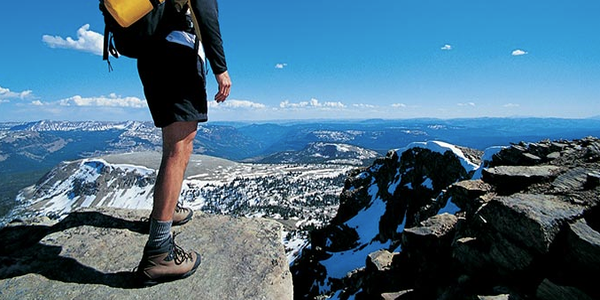

In [8]:
ShowLocalImage('othermathclub/images/landscape/','hiking_cliff.png',600,300)

*miles to go*


<br>${\Huge \infty}$


### Terms


Please copy down the **boldface** definitions in your notebook. Partner share the other terms; this includes
a little problem solving.


- **place** for an integer numeral system: A position in a multiple-digit number counting from right to left
  - In the decimal number $4706$ the digit $7$ is in the third place
  - Oh dear this is confusing... let's try some other related terms out
    - A number represents a quantity or an order...
    - A numeral system is a way of representing numbers. It is easier to write '7' than .......
    - A numeral is a representation of a number in a numeral system
    - A digit is a symbol used in a numeral system
    - Place is a location in a numeral system
      - 23 is a numeral in the base 10 numeral system 
      - It represents this number (as a quantity): ..... ..... ..... ..... ...
      - The digit '2' is in the tens *place*, the '3' is in the ones place
  
  
- **decimal**: A numeral system where place corresponds to a power of $10$ 
  - There are ten digit symbols including '7' and '4'
  - Please write all ten symbols in your notebook
  
  
- **binary**: A numeral system where place corresponds to a power of $2$
  - There are two digits symbols which are '0' and '1'


- quinary: A numeral system where place corresponds to a power of $5$.
  - There are five digit symbols which are: $\_\_,\;\_\_,\;\_\_,\;\_\_,\;\_\_$
  - Example: ${\large 124_{\;base\;5}}$ is four ones plus two fives plus one twenty five. In decimal this is $39$.
  - Example: ${\large 1101_{\;base\;2}}$ is one one, zero twos, one four and one eight. In decimal this is $13$.


- radix: The base of a numeral system. In the above example the radices are 10, 2 and 5


- hexadecimal: A numeral system with radix 16 where place corresponds to a power of $16$
  - There are sixteen digit symbols
  - Please guess what these symbols are
  

<br> ${\Huge \infty}$

How many binary digits are needed to write a single hexadecimal digit?

${\Huge \infty}$


### The row sums of Meru Prastarah


What is the sum of row $n$ of Meru Prastarah? 


#### Solution


The sum of row $n$ of Meru Prastarah is ${\large 2^n}$. We begin numbering the
rows at $0$. The first row sums to $1$ which is $2^0$. The third row is row $2$
and it sums to $2^2=4$. The seventh row is numbered row $6$ and the sum is $64$
which is $2^6$. 


Now that we have established the sum rule for the rows of Meru Prastarah please write 
this in your notebook followed by an answer to the next question:


<br>${\Huge \infty}$


**Why does this work?**


#### Solution 


No solution provided at this time. Please share your solution (or your puzzlement) in OneNote. 


<br>${\Huge \infty}$


#### Key concept problem


If rows of Meru Prastarah are combinations... and combinations count subsets... then *how is it* that the rows 
of Meru Prastarah sum to powers of two? 

/tmp/ipykernel_1863/3304072706.py:29: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  return Image.open(f).resize((width,height),Image.ANTIALIAS)


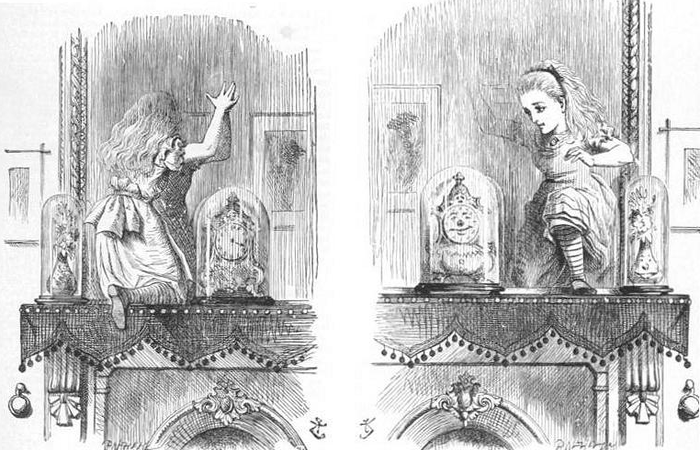

In [9]:
ShowLocalImage('othermathclub/images/alice/','mantle.png',700,450)

*left-- Alice leaving the living room through the mirror... --right-- ...to emerge in 
the looking glass room. The face of the clock on the mantle and other clues confirm her idea 
that the looking glass room might be different.*


### Alice makes an appearance

Lewis Carroll wrote _Through the Looking Glass_, a book about a girl named Alice who has a peculiar
way of looking at things. It is a winter evening and it is snowing outside; so Alice is in the living room by
the fire talking to her kittens. Before long Alice's attention wanders 
to a great mirror on the wall above the mantle over the fireplace. This is a British book so the word 
they use for 'mirror' is 'looking glass'.


Now a *usual* person
knows that a looking glass is simply reflecting the room and the person gazing into it... 
but Alice (being *unusual*) considers that the looking glass separates the room she is in 
from another room entirely. She can see much of what is in that other room but not quite all
of it, even as she climbs up onto the mantle. She can not see 
the fireplace because it is below the mantle, however: hidden from view. 
She wonders: Is a fire burning in the fireplace in the looking glass room? 


As she considers this the glass turning to mist. She steps through the mist into the looking glass room 
and climbs down from the mantle, leaving the kittens behind. 
The looking glass room must exist in a looking glass world where things are not necessarily the same. 
The remainder of the book is Alice's exploration of this world. 

#### What Alice's idea means

I think Alice uses mathematical thinking. As mathematicians we can take something that 
appears rather ordinary and well-understood and consider it from a creative point of view... 
and see where imagination takes us. Let us return to 
Meru Prastarah bearing all this in mind. 


Consider 'sums of lines' drawn through Meru Prastarah. We summed rows above. We might easily indicate
this by drawing a horizontal line through each row -- a sum-line -- and then go on to say 
'add the numbers that each line passes through'. The result would be what we found above, that 
each row sums to a power of two.


Suppose we draw different sum-lines. We could tilt a new set of lines upward slightly -- not so far as diagonal -- 
but just enough to cross multiple rows. We can sum along these new lines in search of a new rule.  
This is our next step: To draw some tilted sum-lines in magenta and calculate those sums.


Please run the code in the next cell to produce a diagram. A paper version is available 
in the club materials. We have a second version of this diagram a little further below as well. 

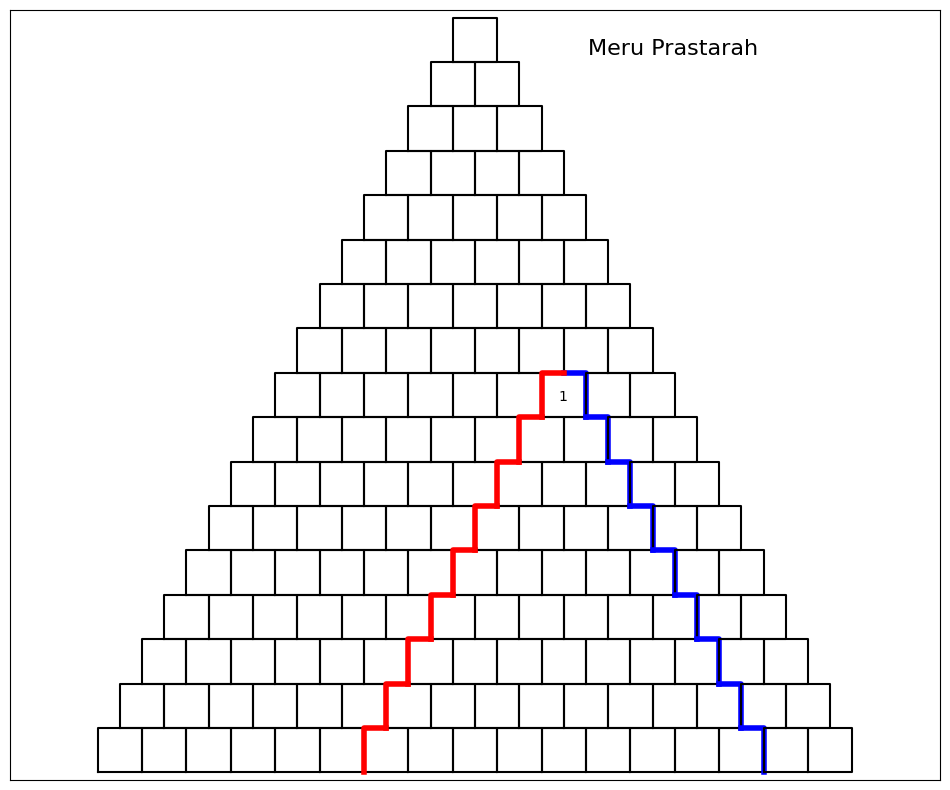

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
%matplotlib inline
pascal_size = 17
(xmp0, ymp0) = (0.61, 0.492)
(xmpDx0, xmpDx1, ympDy) = (0.029, 0.059, 0.059)
# return coordinates based on a = cell (x) and b = row (y)
def xmp(a,b): return xmp0 - float(b)*xmpDx0 + float(a)*xmpDx1
def ymp(a,b): return ymp0 - float(b)*ympDy
fig, ax = plt.subplots(figsize=(12,10))
ax.axis('equal')
ax.set(xlim=(-0.01, 1.01), ylim=(-0.01,1.01))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
(dx, dy) = (1.0/pascal_size, 1.0/pascal_size)
for row in range(pascal_size):
    this_row = row + 1
    for column in range(this_row):
        x = 0.5 - float(this_row)*0.5*dx + float(column)*dx
        y = 1.0 - dy*float(this_row)
        ax.plot([x, x+dx, x+dx, x, x], [y, y, y+dy, y+dy, y], color='k')
        if this_row >= 9 and column == this_row - 3: ax.plot([x+dx/2., x+dx, x+dx], [y + dy, y + dy, y], color='b', linewidth=4)
        if this_row >= 9 and column == 6: ax.plot([x,x,x+dx/2],[y,y+dy,y+dy], color='r', linewidth=4)
for j in range(0, 1):
    for i in range(0,j+1):
        plt.text(xmp(i,j), ymp(i,j), int(comb(j,i)))
plt.text(0.65, 0.95, "Meru Prastarah", fontsize='16')
plt.show()

*A revised version of the Meru Prastarah diagram*


### Please observe 


Meru Prastarah is placed differently in this diagram. 
The number one in cell ${\large \binom{0}{0}}$ is placed
below and to the right of the top of the diagram. 
This is the *summit* or *top* of Mount Meru.
The revised diagram gives us open space above and to the sides of Mount Meru. 
There is a jagged diagonal red line at the left and a jagged blue line at the right. 
Together they bound the relocated Meru Prastarah. 


<br> ${\Huge \infty}$


There are 9 rows of Meru Prastarah visible (rows 0 through 8) with only the top number $1$ filled in. 
Please fill in the rest of the rows between the jagged red and blue lines. 


Run the cell below to add the magenta sum-lines.



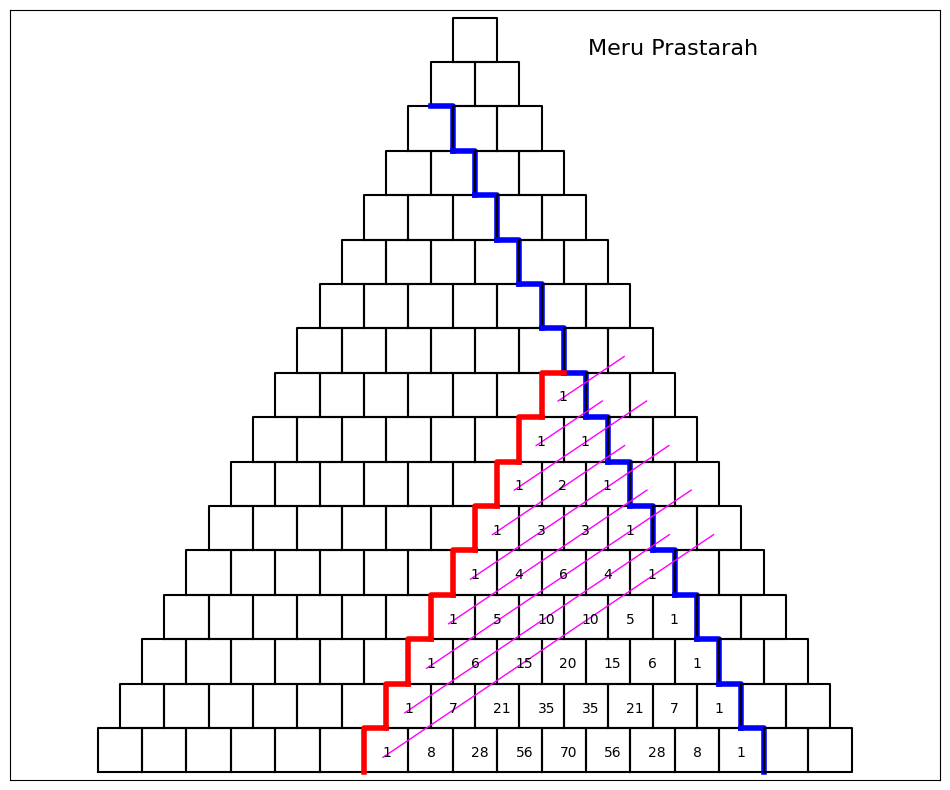

In [11]:
def fibonacci(n):
    f0, f1 = 0, 1
    for i in range(n): tmp = f1; f1 = f0 + f1; f0 = tmp
    return f0

def iccanobif(n):
    f0, f1 = 0, 1
    for i in range(n): tmp = f0; f0 = f1 - f0; f1 = tmp
    return f1

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
%matplotlib inline
pascal_size = 17
(xmp0, ymp0) = (0.61, 0.492)
(xmpDx0, xmpDx1, ympDy) = (0.029, 0.0586, 0.059)
# return coordinates based on a = cell (x) and b = row (y)
def xmp(a,b): return xmp0 - float(b)*xmpDx0 + float(a)*xmpDx1
def ymp(a,b): return ymp0 - float(b)*ympDy
fig, ax = plt.subplots(figsize=(12,10))
ax.axis('equal')
ax.set(xlim=(-0.01, 1.01), ylim=(-0.01,1.01))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
(dx, dy) = (1.0/pascal_size, 1.0/pascal_size)
for row in range(int(pascal_size)):
    this_row = row + 1
    for column in range(this_row):
        x = 0.5 - float(this_row)*0.5*dx + float(column)*dx
        y = 1.0 - dy*float(this_row)
        ax.plot([x, x+dx, x+dx, x, x], [y, y, y+dy, y+dy, y], color='k')
        if this_row >= 3 and column == this_row - 3: ax.plot([x+dx/2., x+dx, x+dx], [y + dy, y + dy, y], color='b', linewidth=4)
        if this_row >= 9 and column == 6: ax.plot([x,x,x+dx/2],[y,y+dy,y+dy], color='r', linewidth=4)
for j in range(0, 9):
    for i in range(0,j+1):
        plt.text(xmp(i,j), ymp(i,j), int(comb(j,i)))
for j in range(9):
    (x0, y0) = (xmp(0,j), ymp(0,j))
    (iMap, jMap) = (j//2+1, (j+1)//2-1)
    (x1, y1) = (xmp(iMap, jMap), ymp(iMap, jMap))
    ax.plot([x0, x1], [y0, y1], color='magenta', linewidth=1)
plt.text(0.65, 0.95, "Meru Prastarah", fontsize='16')
plt.show()

*A revised revised version of the Meru Prastarah diagram*


### Please observe 

The diagram above is like the previous one; but now the $9$ rows of Meru Prastarah are 
filled in with numbers in the cells; and there are two other additions.  
First: The jagged blue line has been extended upward to the left.
Second: Nine magenta sum-lines are drawn. Each begins on the $1$ along the left edge of Meru Prastarah. 
They go up and to the right to end on an empty cell on the far right of Meru Prastarah. 
These empty cells where the sum-lines end are where we shall write the sums. Notice that
the magenta lines pass through the *centers* of only some of the cells of Meru Prastarah. 


${\Huge \infty}$


The bottom magenta sum-line begins at the lowest $1$ in row 8 and passes through the centers of 
cells with numbers $7$, $15$, $10$, and $1$. These five numbers are from rows $8$, $7$, $6$,
$5$ and $4$ and they add up to $34$. This is the sum on that magenta sum-line so please write 
the number $34$ in the empty cell where the sum-line ends. 


There are eight more magenta sum-lines. Sum the numbers of the cells they pass through 
and write those numbers in the empty cells where the sum-lines end. The very last magenta
sum-line begins at ${\large \binom{0}{0}}$ and includes only itself, the number $1$, so its sum is $1$. 
The magenta sum-line below that also has only one $1$ and therefore a sum of $1$.


Copy the sequence of magenta sums in your notebook. Read the numbers from top to bottom
and copy them in a line from left to right. Does this look familiar? 
This is the *second result*.

${\Huge \infty}$


### What is the sequence?


Please determine the name of the magenta sequence. Write the numbers of this sequence in your notebook:


$${\large \_\_\;,\;\_\_\;,\;\_\_\;,\;\_\_\;,\;\_\_\;,\;\_\_\;,\;\_\_\;,\;\_\_\;,\;\_\_\;,\;\dots}$$


Suppose we are told that this sequence follows a rule going from left to right. 
You would quickly be able to guess this rule and you could use it to continue writing
numbers off to the right, *ad infinitum*. That's where those three dots are, as usual
meaning 'and so on forever...' If you were obliged to continue writing the first trillion or so numbers
of this sequence your piece of paper would need to be quite long, 
eventually going out the door and down the hall and through a window and down the street and off 
into space. This forward direction is the *usual* view of this sequence, going off to the right
forever, the numbers steadily growing larger. 


Let's take our next motive from Alice's *unusual* nature. Why must this sequence of numbers
only begin here and extend off in the one direction, to the right? Might there be a looking glass 
world where these same numbers go off in another direction as well? We could indicate this by placing three 
more dots at the beginning like so: 


$${\large \dots\;,\;\_\_\;,\;\_\_\;,\;\_\_\;,\;\_\_\;,\;\_\_\;,\;\_\_\;,\;\_\_\;,\;\_\_\;,\;\_\_\;,\;\dots}$$


Suppose you decide there is a rule for going from right to left in this sequence. 
What is that rule? What happens if you follow it to the left for several steps? 


Once you have determined this off-to-the-left pattern please write the new numbers in place in your
Meru Prastarah diagram. That is, follow the pattern of the magenta sum boxes upwards and to the 
left, writing the numbers you just found. Let's call these the Iccanobif numbers.


Our magenta sums came from the cells of Meru Prastarah. But how doe we know that this is the correct
way of thinking about it? Perhaps it is the reverse. Before proceeding to the next page please consider 
this final question:


${\Huge \infty}$


*Just as our magenta sums continue up and to the left, up beyond the summit of
Meru Prastarah... what if Meru Prastarah itself continued upwards?*


### Extra


The first diagonal of Meru Prastarah is ones. The second diagonal is the counting numbers 1, 2, 3, ... and
we mentioned earlier that the third diagonal is called triangular numbers. Why would the fourth diagonal
be called *tetrahedral* numbers?

/tmp/ipykernel_1863/3304072706.py:29: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  return Image.open(f).resize((width,height),Image.ANTIALIAS)


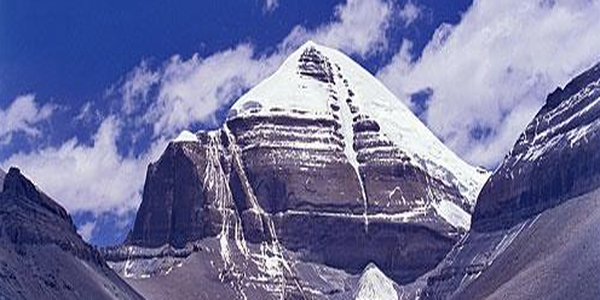

In [12]:
ShowLocalImage(meru_d,'mount_meru_2.png',600,300)

### Friendly introduction to Part 3


Previously we found the Fibonacci sequence in the magenta sums; 
and we have found the reverse rule that carries these numbers up above Mount Meru. Now the question
is: If the Fibonacci numbers can continue upwards in an unexpected direction: Why can't Meru Prastarah
do the same? 


Let's begin by re-drawing our results so far including the Fibonacci sequence extended to include the iccanobiF
sequence...

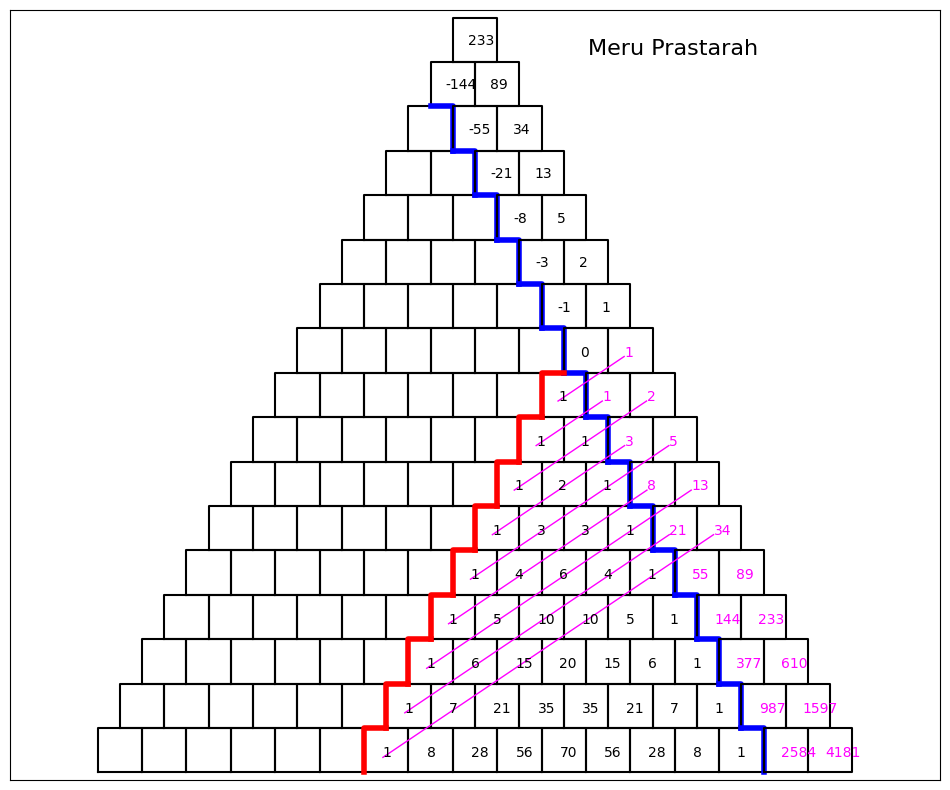

In [13]:


fig, ax = plt.subplots(figsize=(12,10))
ax.axis('equal')
ax.set(xlim=(-0.01, 1.01), ylim=(-0.01,1.01))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
(dx, dy) = (1.0/pascal_size, 1.0/pascal_size)

# create the cells
for row in range(int(pascal_size)):
    this_row = row + 1
    for column in range(this_row):
        x = 0.5 - float(this_row)*0.5*dx + float(column)*dx
        y = 1.0 - dy*float(this_row)
        ax.plot([x, x+dx, x+dx, x, x], [y, y, y+dy, y+dy, y], color='k')
        if this_row >= 3 and column == this_row - 3: ax.plot([x+dx/2., x+dx, x+dx], [y + dy, y + dy, y], color='b', linewidth=4)
        if this_row >= 9 and column == 6: ax.plot([x,x,x+dx/2],[y,y+dy,y+dy], color='r', linewidth=4)

# write in the numbers of the first 9 rows        
for j in range(0, 9):
    for i in range(0,j+1):
        plt.text(xmp(i,j), ymp(i,j), int(comb(j,i)))

# draw in the magenta sum-lines
for j in range(9):
    (x0, y0) = (xmp(0,j), ymp(0,j))
    (iMap, jMap) = (j//2+1, (j+1)//2-1)
    (x1, y1) = (xmp(iMap, jMap), ymp(iMap, jMap))
    ax.plot([x0, x1], [y0, y1], color='magenta', linewidth=1)
    
# write in the fibonacci numbers           
for j in range(0, 19):
    col = 1 + int((j)//2)-((j)%2)//2
    row = int((j+1)//2) - 1
    plt.text(xmp(col,row), ymp(col,row), fibonacci(j+1), color='magenta')

# write in the iccanobif numbers
for j in range(-1, 13):
    col = int(-j//2)-(-j%2)//2
    row = int((-j-1)//2) - 1
    plt.text(xmp(col,row), ymp(col,row), iccanobif(j+2))

plt.text(0.65, 0.95, "Meru Prastarah", fontsize='16')
plt.show()

*Figure A. The iccanobif sequence extends upwards... is there room enough for another mountain?*


<br>${\Huge \infty}$


### A second mountain


Is there room on Figure A for a second mountain of numbers? How would you fill it in? 


There is no *correct answer* here. Rather this is an opportunity to try different ideas out.


The method I used places numbers in the above diagram: In cells that do *not* already have numbers in them. 
The next notebook called **4 B Meru Prastarah** includes this solution. We'll stop here to give you some
space to ponder.

/tmp/ipykernel_1863/3304072706.py:29: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  return Image.open(f).resize((width,height),Image.ANTIALIAS)


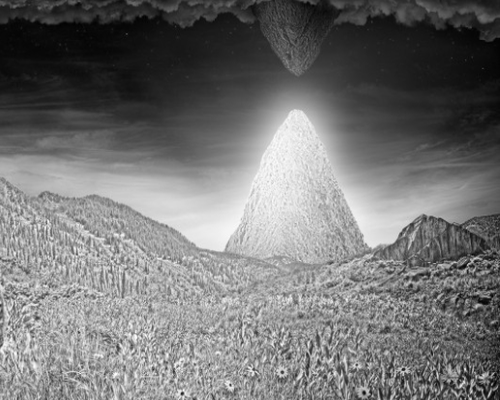

In [14]:
ShowLocalImage(meru_d, 'meru_reflected.png',500,400)

### Friendly introduction

This is the last notebook in a sequence of four on Meru Prastarah. Here we give one possible approach to completing
the table by reflecting the original mountain up and to the left 'into the sky'. 

### Terms

### One way to go

On the previous notebook **3 B Meru Prastarah** we set up a question like this:


- Here is Meru Prastarah
- Here are the sums of the rows
- Here are the magenta sums (tilted rows): Fibonacci sequence
- Fibonacci goes forward forever
- Fibonacci can go backwards forever also
- We can write backwards-Fibonacci up into the sky above Meru Prastarah
- If Meru Prastarah gave us Fibonacci: Can backwards-Fibonacci give us backwards Meru Prastarah? 

This is: How could you use the continuation of Fibonacci upwards to also continue Meru Prastarah upwards?' 


Before reading on here please write down any ideas you came up with.


One idea is to say 'the same magenta lines must continue to work'. We then draw magenta lines down and to the left
from the backwards-Fibonacci numbers and try to fill in the empty cells so that we get the correct sums.
That is: The original magenta sum-lines went *from* Meru Prastarah *to* the Fibonacci sequence. Now we 
enter the looking glass world and go *from* Fibonacci *to* Meru Prastarah. Really backwards-Fibonacci
to backwards-Meru Prastarah. 


<br>${\Huge \infty}$


Why will we call these backwards parts of the diagram **iccanobif** and **haratsarpurem**?


**Solution** To be sure going backwards is not obvious. After some experimenting I came up with the idea 
of extending the line of ones along the right edge of Meru Prastarah upwards and to the left, bordering 
iccanobif. This makes it so that the rest of haratsarpurem will fill in 
pretty much automatically. 

Next I noticed that the zeroth Fibonacci number which is also the zeroth iccanobif number happens to be 
zero; and this means that it's sum-line is zero. In the figure below this sum-line is drawn in black.
It is zero if it lands on a cell with a zero in it; so I put a zero there. Then I put zeros across
that row going to the left. That is: The summit of Meru Prastarah is row 0 and cell 0 is the only non-zero
cell (which has value 1). The remaining cells -- it seems reasonable to say -- are all zero. This
works for iccanobif number 1 which is 1. Notice that in the figure below its sum line is drawn in green
and it touches just one cell with value 1; so the sum works out. 

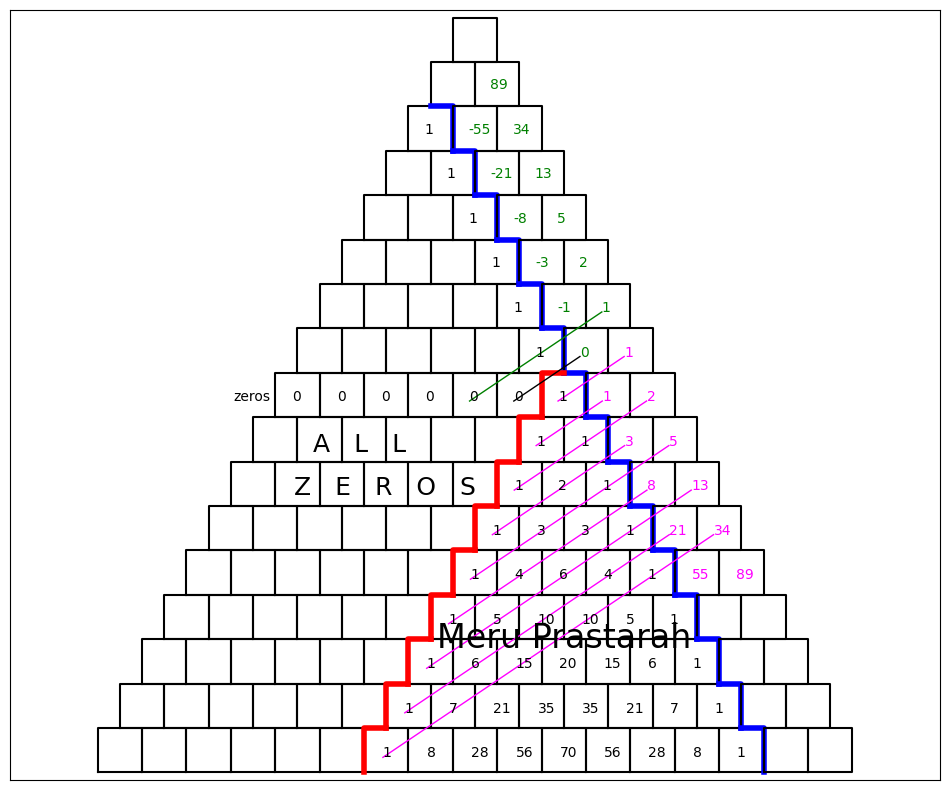

In [15]:
fig, ax = plt.subplots(figsize=(12,10))
ax.axis('equal')
ax.set(xlim=(-0.01, 1.01), ylim=(-0.01,1.01))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
(dx, dy) = (1.0/pascal_size, 1.0/pascal_size)

# create the cells
for row in range(int(pascal_size)):
    this_row = row + 1
    for column in range(this_row):
        x = 0.5 - float(this_row)*0.5*dx + float(column)*dx
        y = 1.0 - dy*float(this_row)
        ax.plot([x, x+dx, x+dx, x, x], [y, y, y+dy, y+dy, y], color='k')
        if this_row >= 3 and column == this_row - 3: ax.plot([x+dx/2., x+dx, x+dx], [y + dy, y + dy, y], color='b', linewidth=4)
        if this_row >= 9 and column == 6: ax.plot([x,x,x+dx/2],[y,y+dy,y+dy], color='r', linewidth=4)

# write in the numbers of the first 9 rows        
for j in range(0, 9):
    for i in range(0,j+1):
        plt.text(xmp(i,j), ymp(i,j), int(comb(j,i)))

# draw in the magenta sum-lines
for j in range(9):
    (x0, y0) = (xmp(0,j), ymp(0,j))
    (iMap, jMap) = (j//2+1, (j+1)//2-1)
    (x1, y1) = (xmp(iMap, jMap), ymp(iMap, jMap))
    ax.plot([x0, x1], [y0, y1], color='magenta', linewidth=1)
    
# write in the fibonacci numbers           
for j in range(0, 11):
    col = 1 + int((j)//2)-((j)%2)//2
    row = int((j+1)//2) - 1
    plt.text(xmp(col,row), ymp(col,row), fibonacci(j+1), color='magenta')

# write in the iccanobif numbers
for j in range(-1, 11):
    col = int(-j//2)-(-j%2)//2
    row = int((-j-1)//2) - 1
    plt.text(xmp(col,row), ymp(col,row), iccanobif(j+2), color='g')

plt.text(0.18, 0.492, 'zeros')
plt.text(0.286, 0.425, 'A   L   L', fontsize='18')
plt.text(0.26, 0.368, 'Z   E   R   O   S', fontsize='18')
for j in range(-6, 0):
    plt.text(xmp(j, 0), ymp(j, 0), 0)
    plt.text(xmp(j, j), ymp(j,j), 1)
    
(x0, y0) = (xmp(0, -1), ymp(0, -1))
(x1, y1) = (xmp(-1, 0), ymp(-1, 0))
ax.plot([x0, x1], [y0, y1], color='k', linewidth=1)
(x0, y0) = (xmp(0, -2), ymp(0, -2))
(x1, y1) = (xmp(-2, 0), ymp(-2, 0))
ax.plot([x0, x1], [y0, y1], color='green', linewidth=1)

    
plt.text(0.45, 0.165, "Meru Prastarah", fontsize='24')
plt.show()

Let's use the same location system for cells in haratsarpurem that we used for Meru Prastarah. 
That is: First rows, and then cells within rows, starting at $\binom{0}{0}$. So far we have
filled in just the first entry of each row, setting it equal to $1$. We also put in some
'buffer' zeros along the other edge of haratsarpurem. 


Now the rest of haratsarpurem follows. iccanobif-2 is $-1$ and its sum-line
touches only one cell of haratsarpurem, which is cell $\binom{1}{1}$. Therefore it is given
the value $-1$. Here is our first difference from Meru Prastarah where the cell value was $1$. 


Iccanobif-3 is $2$ which must be the line sum across two cells: $2 = \binom{1}{0} + \binom{2}{2}$.
Since $\binom{1}{0}=1$ we must have $\binom{2}{2}=1$ also so that they sum to $2$. 


Now we have a new pattern along the second edge of haratsarpurem, the edge where the addresses are
$\binom{0}{0}, \;\binom{1}{1}, \;\binom{2}{2}, \;\binom{3}{3}, \;\binom{4}{4}, \;\dots$. That
is, from the first three values it appears to be alternating $+1$ and $-1$. Let's take that
to be the pattern and fill in the numbers in this way. 

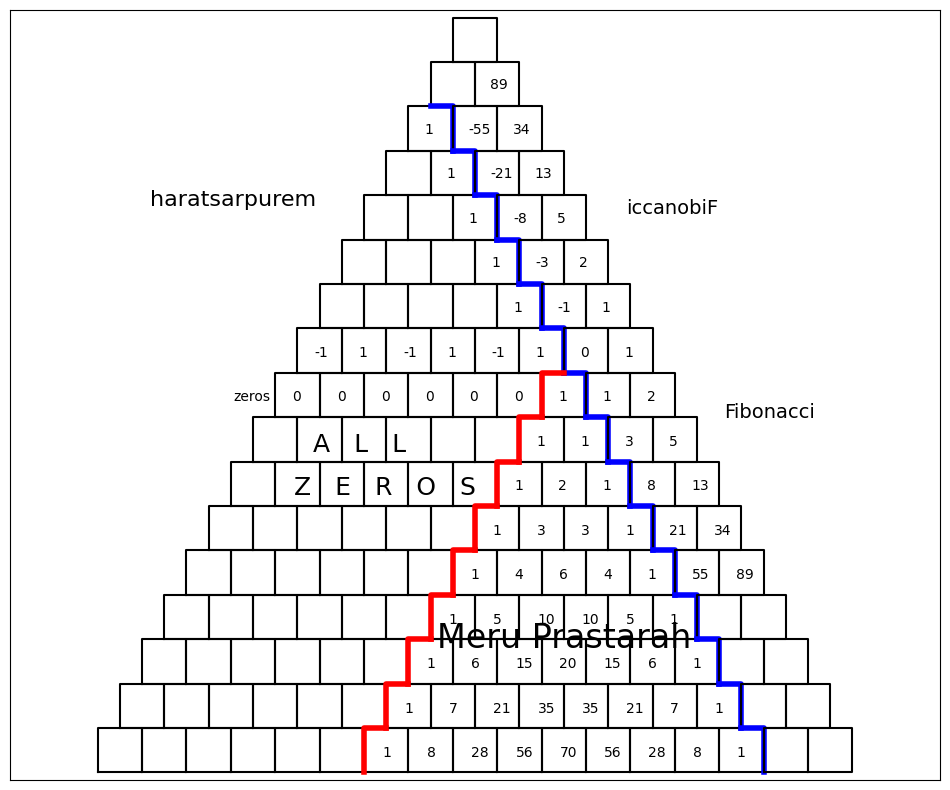

In [16]:
fig, ax = plt.subplots(figsize=(12,10))
ax.axis('equal')
ax.set(xlim=(-0.01, 1.01), ylim=(-0.01,1.01))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
(dx, dy) = (1.0/pascal_size, 1.0/pascal_size)

# create the cells
for row in range(int(pascal_size)):
    this_row = row + 1
    for column in range(this_row):
        x = 0.5 - float(this_row)*0.5*dx + float(column)*dx
        y = 1.0 - dy*float(this_row)
        ax.plot([x, x+dx, x+dx, x, x], [y, y, y+dy, y+dy, y], color='k')
        if this_row >= 3 and column == this_row - 3: ax.plot([x+dx/2., x+dx, x+dx], [y + dy, y + dy, y], color='b', linewidth=4)
        if this_row >= 9 and column == 6: ax.plot([x,x,x+dx/2],[y,y+dy,y+dy], color='r', linewidth=4)

# write in the numbers of the first 9 rows        
for j in range(0, 9):
    for i in range(0,j+1):
        plt.text(xmp(i,j), ymp(i,j), int(comb(j,i)))
    
# write in the fibonacci numbers           
for j in range(0, 11):
    col = 1 + int((j)//2)-((j)%2)//2
    row = int((j+1)//2) - 1
    plt.text(xmp(col,row), ymp(col,row), fibonacci(j+1))

# write in the iccanobif numbers
for j in range(-1, 11):
    col = int(-j//2)-(-j%2)//2
    row = int((-j-1)//2) - 1
    plt.text(xmp(col,row), ymp(col,row), iccanobif(j+2))

plt.text(0.18, 0.492, 'zeros')
plt.text(0.286, 0.425, 'A   L   L', fontsize='18')
plt.text(0.26, 0.368, 'Z   E   R   O   S', fontsize='18')
for j in range(-6, 0):
    plt.text(xmp(j, 0), ymp(j, 0), 0)
    plt.text(xmp(j, j), ymp(j,j), 1)

alt_1 = -1
for j in range(-6, -1):
    plt.text(xmp(j, -1), ymp(j, -1), alt_1)
    alt_1 = -alt_1
    
    
plt.text(0.45, 0.165, "Meru Prastarah", fontsize='24')
plt.text(0.07, 0.75, "haratsarpurem", fontsize='16')
plt.text(0.83, 0.47, "Fibonacci", fontsize='14')
plt.text(0.70, 0.74, "iccanobiF", fontsize='14')
plt.show()

### Finishing haratsarpurem


Now the interior of the haratsarpurem pattern follows. $\binom{2}{2}$ must be $-2$ and so on. In fact
haratsarpurem can be seen as Meru Prastarah with half of the numbers now negative instead of positive. 


A negative number can be seen as a positive number reflected through zero. Therefore we can conclude 
that haratsarpurem is a version of Meru Prastarah that is half-reflected... so the metaphor of the
looking glass worked out for us.


<br>${\Huge \infty}$


What is the sum of rows in haratsarpurem? 

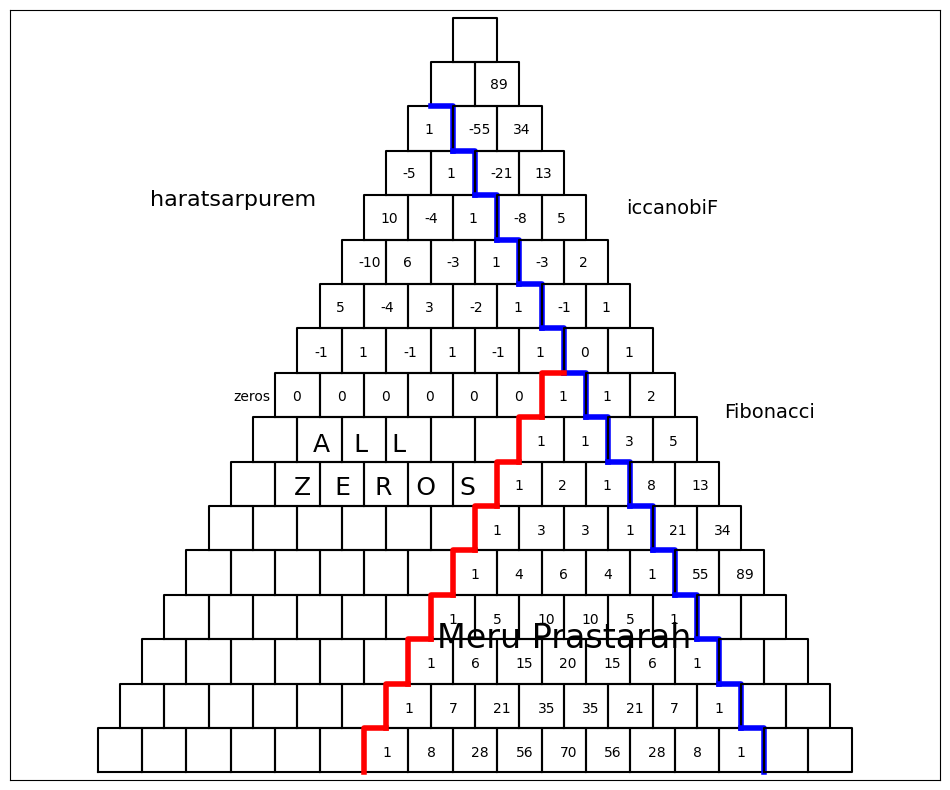

In [17]:
fig, ax = plt.subplots(figsize=(12,10))
ax.axis('equal')
ax.set(xlim=(-0.01, 1.01), ylim=(-0.01,1.01))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
(dx, dy) = (1.0/pascal_size, 1.0/pascal_size)

# create the cells
for row in range(int(pascal_size)):
    this_row = row + 1
    for column in range(this_row):
        x = 0.5 - float(this_row)*0.5*dx + float(column)*dx
        y = 1.0 - dy*float(this_row)
        ax.plot([x, x+dx, x+dx, x, x], [y, y, y+dy, y+dy, y], color='k')
        if this_row >= 3 and column == this_row - 3: ax.plot([x+dx/2., x+dx, x+dx], [y + dy, y + dy, y], color='b', linewidth=4)
        if this_row >= 9 and column == 6: ax.plot([x,x,x+dx/2],[y,y+dy,y+dy], color='r', linewidth=4)

# write in the numbers of the first 9 rows        
for j in range(0, 9):
    for i in range(0,j+1):
        plt.text(xmp(i,j), ymp(i,j), int(comb(j,i)))
    
# write in the fibonacci numbers           
for j in range(0, 11):
    col = 1 + int((j)//2)-((j)%2)//2
    row = int((j+1)//2) - 1
    plt.text(xmp(col,row), ymp(col,row), fibonacci(j+1))

# write in the iccanobif numbers
for j in range(-1, 11):
    col = int(-j//2)-(-j%2)//2
    row = int((-j-1)//2) - 1
    plt.text(xmp(col,row), ymp(col,row), iccanobif(j+2))

plt.text(0.18, 0.492, 'zeros')
plt.text(0.286, 0.425, 'A   L   L', fontsize='18')
plt.text(0.26, 0.368, 'Z   E   R   O   S', fontsize='18')
for j in range(-6, 0):
    plt.text(xmp(j, 0), ymp(j, 0), 0)
    plt.text(xmp(j, j), ymp(j,j), 1)

alt_1 = -1
for j in range(-6, -1):
    plt.text(xmp(j, -1), ymp(j, -1), alt_1)
    alt_1 = -alt_1

for i in range(-5, -1):
    for j in range(-6, i):
        the_sign = 1 - 2*((i+j)%2)
        plt.text(xmp(j, i), ymp(j, i), the_sign*int(comb(-j-1,-i-1)))

    
plt.text(0.45, 0.165, "Meru Prastarah", fontsize='24')
plt.text(0.07, 0.75, "haratsarpurem", fontsize='16')
plt.text(0.83, 0.47, "Fibonacci", fontsize='14')
plt.text(0.70, 0.74, "iccanobiF", fontsize='14')
plt.show()

### And then...


This is the end of an initial look at the Pascal Triangle, Meru Prastarah, ... and by any other names the
mathematical structure of numbers that describe the counting of subsets. 


If you wish to explore this further just say the word. There are many more hikes to follow. And you may
certainly look into the sequence of notebooks concerned with Fibonacci.